In [15]:
from skimage.io import imread
from skimage.util import img_as_ubyte
import os 
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import laplace, sobel 
from skimage.filters.rank import mean
from skimage.exposure import adjust_gamma

/var/folders/bt/wjrbwq457gb7tk4q8jnt0s140000gp/T/ipykernel_29681/415714361.py:12: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  average_sobel = mean(sobel_img,box_filter_5x5)


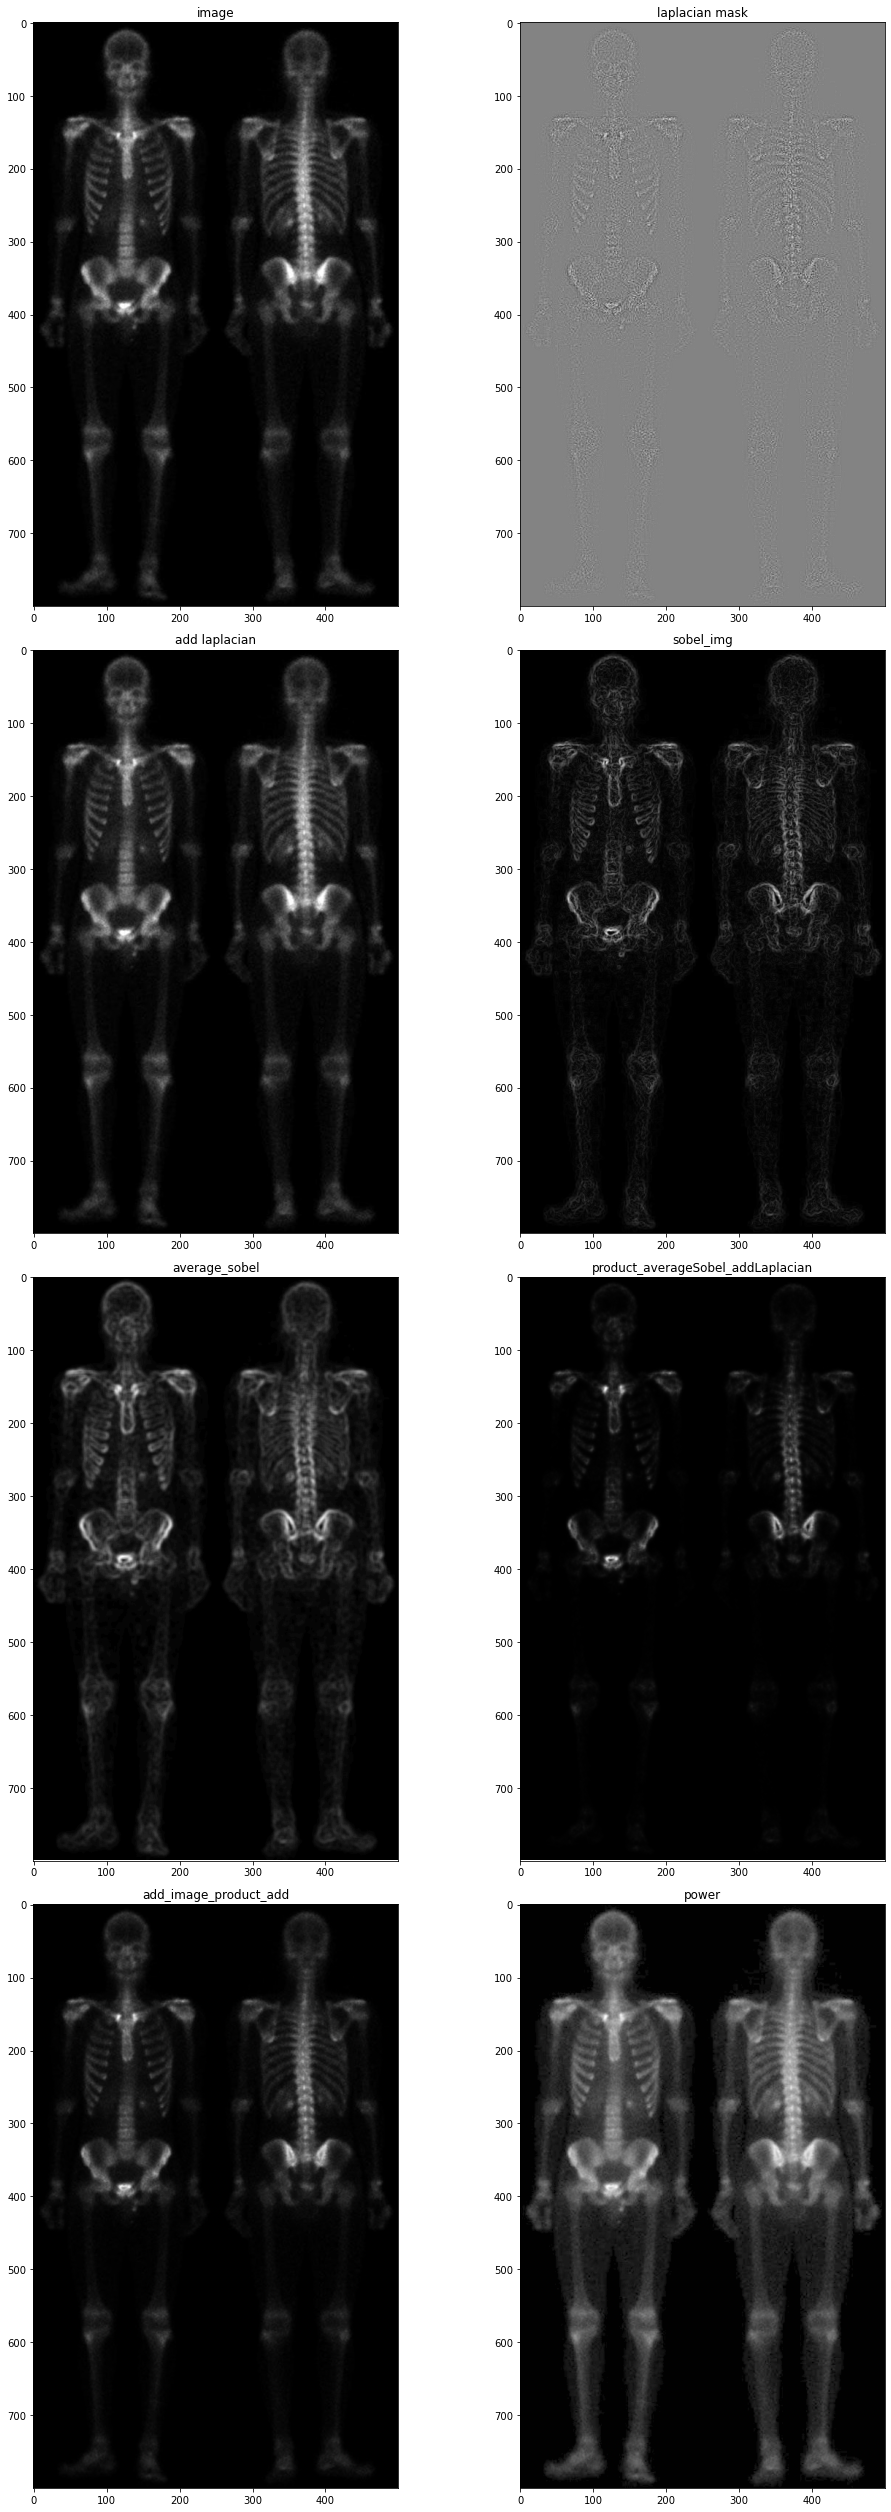

In [17]:
image = img_as_ubyte(imread(os.path.join(os.getcwd(),'./skeleton.tif'), as_gray=True))


laplacian = (laplace(image, ksize=3))

add_laplacian = image + laplacian

sobel_img = sobel(image)

box_filter_5x5 = (1 / 25) * np.ones((5, 5), dtype=np.float64)

average_sobel = mean(sobel_img,box_filter_5x5)

product_averageSobel_addLaplacian = np.multiply( add_laplacian ,average_sobel)
product_averageSobel_addLaplacian += np.abs(product_averageSobel_addLaplacian.min())
product_averageSobel_addLaplacian *= (255/product_averageSobel_addLaplacian.max())

add_image_product_add = image + product_averageSobel_addLaplacian

power = adjust_gamma(add_image_product_add,gamma=0.5)

plt.figure(figsize=(15,35))
plt.subplot(4,2,1), plt.imshow(image, cmap="gray"), plt.title("image")
plt.subplot(4,2,2), plt.imshow(laplacian, cmap="gray"), plt.title("laplacian mask")
plt.subplot(4,2,3), plt.imshow(add_laplacian, cmap="gray"), plt.title("add laplacian")
plt.subplot(4,2,4), plt.imshow(sobel_img, cmap="gray"), plt.title("sobel_img")
plt.subplot(4,2,5), plt.imshow(average_sobel, cmap="gray"), plt.title("average_sobel")
plt.subplot(4,2,6), plt.imshow(product_averageSobel_addLaplacian, cmap="gray"), plt.title("product_averageSobel_addLaplacian")
plt.subplot(4,2,7), plt.imshow(add_image_product_add, cmap="gray"), plt.title("add_image_product_add")
plt.subplot(4,2,8), plt.imshow(power, cmap="gray"), plt.title("power")
plt.tight_layout()

plt.savefig("4-result.jpg")

plt.show()
